In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv("../data/ratings.csv")
books = pd.read_csv("../data/books.csv")

In [3]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
books=books[['book_id','authors','title','ratings_count']]
books.info()
books.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
book_id          10000 non-null int64
authors          10000 non-null object
title            10000 non-null object
ratings_count    10000 non-null int64
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


,book_id,authors,title,ratings_count
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",3866839
3,4,Harper Lee,To Kill a Mockingbird,3198671
4,5,F. Scott Fitzgerald,The Great Gatsby,2683664


In [5]:
ratings_pivot = pd.pivot_table(ratings, values='rating', index='user_id', columns='book_id', aggfunc='mean', fill_value=None)

In [6]:
ratings_pivot.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
books[books['authors'].str.contains("Napoleon Hill")]

,book_id,authors,title,ratings_count
679,680,Napoleon Hill,Think and Grow Rich: The Landmark Bestseller -...,87445


In [8]:
desired_book_ratings = ratings_pivot[680]
desired_book_ratings[desired_book_ratings>0].count()

639

In [9]:
similar_books = ratings_pivot.corrwith(desired_book_ratings)

/Users/saman/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/saman/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [10]:
corr_with_desired_book = pd.DataFrame(similar_books, columns=['pearson_r_correlation'])
corr_with_desired_book = corr_with_desired_book.join(books[['ratings_count','title','authors']])
corr_with_desired_book.head()

,pearson_r_correlation,ratings_count,title,authors
book_id,,,,
1,0.252916,4602479.0,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
2,0.162493,3866839.0,"Twilight (Twilight, #1)",Stephenie Meyer
3,0.042729,3198671.0,To Kill a Mockingbird,Harper Lee
4,0.132945,2683664.0,The Great Gatsby,F. Scott Fitzgerald
5,0.181735,2346404.0,The Fault in Our Stars,John Green


In [11]:
corr_with_desired_book[corr_with_desired_book['ratings_count']>100].sort_values(['pearson_r_correlation','ratings_count'], ascending=[False,False])

,pearson_r_correlation,ratings_count,title,authors
book_id,,,,
443,1.0,207550.0,"Winnie-the-Pooh (Winnie-the-Pooh, #1)","A.A. Milne, Ernest H. Shepard"
541,1.0,189671.0,"The Horse and His Boy (Chronicles of Narnia, #5)",C.S. Lewis
680,1.0,165127.0,"Little House in the Big Woods (Little House, #1)","Laura Ingalls Wilder, Garth Williams"
683,1.0,159774.0,"The House of Hades (The Heroes of Olympus, #4)",Rick Riordan
811,1.0,138871.0,"Fallen Too Far (Rosemary Beach, #1; Too Far, #1)",Abbi Glines
656,1.0,114531.0,The White Tiger,Aravind Adiga
837,1.0,104467.0,"Xenocide (Ender's Saga, #3)",Orson Scott Card
880,1.0,102419.0,The Man Who Mistook His Wife for a Hat and Oth...,Oliver Sacks
1275,1.0,99942.0,"Unearthly (Unearthly, #1)",Cynthia Hand


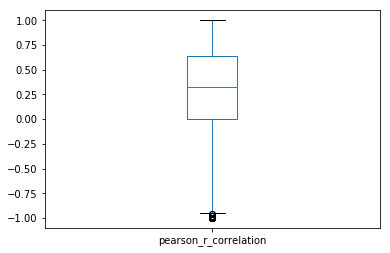

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

corr_with_desired_book[corr_with_desired_book['ratings_count']>100]['pearson_r_correlation'].plot('box')

In [14]:
corr_with_desired_book.groupby('pearson_r_correlation')['title'].count()

pearson_r_correlation
-1.000000     52
-1.000000    173
-1.000000      6
-0.981981      3
-0.962250      1
-0.962250      1
-0.953463      1
-0.944911      6
-0.944911      1
-0.943456      1
-0.942809      1
-0.939336      1
-0.928571      1
-0.927173      3
-0.904534      1
-0.891042      1
-0.884652      1
-0.875000      1
-0.872872      1
-0.870388      1
-0.866400      1
-0.866025     24
-0.866025      8
-0.846154      1
-0.845154      1
-0.842927      1
-0.840168      1
-0.816497      2
-0.813489      1
-0.807692      1
            ... 
 0.956183      1
 0.958373      1
 0.960769      1
 0.960769      1
 0.962250      2
 0.963087      1
 0.964286      1
 0.966092      0
 0.968246      1
 0.968246      1
 0.968246      3
 0.968330      2
 0.968496      1
 0.970725      2
 0.970725      1
 0.970725      2
 0.971061      1
 0.972529      1
 0.973009      1
 0.975900      1
 0.981981     11
 0.982708      1
 0.984732      1
 0.984732      1
 0.986440      2
 0.986928      1
 0.995871